In [1]:
# %%
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path
from night import night
from dict_legend import dict_var_disp, dict_var_ylabel, dict_var_title
from supy_plot import supy_plot
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")

# %%
sp.show_version()

SuPy versions
-------------
supy: 2021.1.7 
supy_driver: 2020b10

SYSTEM DEPENDENCY

INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.0.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.18362
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.1.5
numpy            : 1.19.5
pytz             : 2020.5
dateutil         : 2.8.1
pip              : 20.3.3
setuptools       : 51.1.1
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.3.3
html5lib         : None
pymysql          : None
psycopg2         : 2.8.4 (dt dec pq3 ext lo64)
jinja2           : 2.11.1
IPython       

In [2]:
# %%
# Sample Data
path_runcontrol_s = Path('SuPy/src/supy/sample_run')/ 'RunControl.nml'
df_state_init_s = sp.init_supy(path_runcontrol_s)
grid_s = df_state_init_s.index[0]
df_forcing_s = sp.load_forcing_grid(path_runcontrol_s, grid_s)

# Wisley Data
path_runcontrol_w = Path('SuPy/src/supy/sample_run')/ 'RunControl.nml'
df_state_init_w = sp.init_supy(path_runcontrol_w)
grid_w = df_state_init_w.index[0]
df_forcing_w = sp.load_forcing_grid(path_runcontrol_w, grid_w)

sp.check_forcing(df_forcing_s)
sp.check_forcing(df_forcing_w)

2021-01-07 16:29:32,061 - SuPy - INFO - All cache cleared.
2021-01-07 16:29:33,324 - SuPy - INFO - All cache cleared.
2021-01-07 16:29:35,493 - SuPy - INFO - All cache cleared.
2021-01-07 16:29:36,857 - SuPy - INFO - All cache cleared.
2021-01-07 16:29:38,981 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-01-07 16:29:43,472 - SuPy - INFO - All checks for `df_forcing` passed!
2021-01-07 16:29:43,473 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-01-07 16:29:47,942 - SuPy - INFO - All checks for `df_forcing` passed!


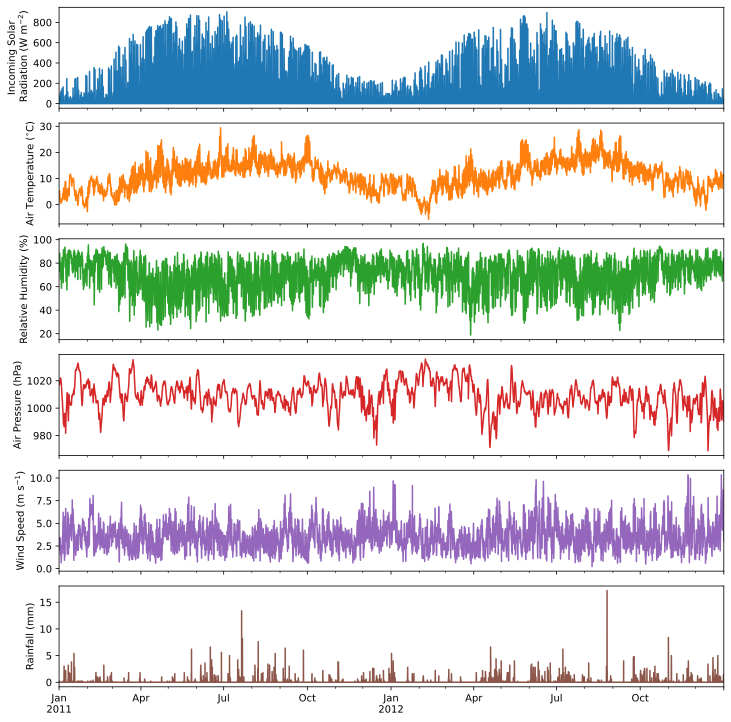

In [3]:
# %%
list_var_forcing = [
    'kdown',
    'Tair',
    'RH',
    'pres',
    'U',
    'rain',
]
dict_var_label = {
    'kdown': 'Incoming Solar\n Radiation ($ \mathrm{W \ m^{-2}}$)',
    'Tair': 'Air Temperature ($^{\circ}}$C)',
    'RH': r'Relative Humidity (%)',
    'pres': 'Air Pressure (hPa)',
    'rain': 'Rainfall (mm)',
    'U': 'Wind Speed (m $\mathrm{s^{-1}}$)'
}
df_plot_forcing_x = df_forcing_s.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

In [4]:
# %% Investigate Metreological conditions for London and Wisley
#df_forcing_s = df_forcing_s.add_suffix('_s')
#df_forcing_w = df_forcing_w.add_suffix('_w')
# _m for merge

#df_forcing_m = pd.concat([df_forcing_s,df_forcing_w], axis=1, join='inner')


# # %% June Tair Sample Data
# s = '2012 6'
# e = '2012 6'
# ax = sp.util.plot_day_clm(df_forcing_m.loc[s:e, ['Tair_s']])

# # %% June Tair Wisley Data 
# s = '2012 07 20'
# e = '2012 07 27'
# ax_output = df_forcing_m.loc[s:e,['Tair_w']].plot(figsize=(12,10))
# night_2(ax_output)

# # %%  Tair Selected days comparison

# s = '2012 07 20'
# e = '2012 07 27'
# ax_output = df_forcing_m.loc[s:e,['Tair_s','Tair_w']].plot(figsize=(12,10))
# night_2(ax_output)

In [5]:
# %% Set reasonable settings Wisley and WisleyUrban

#### Three scenario Used
# 1. Initial conditions used in sample data - Used Suffix: s
# 2. Building fraction = 0. grass = .41 - Population day/night = 0 - Used Suffix: _w         (Wisley Conditions)
# 3. London initial conditions with whisley met data - Used Suffix WU (Wisley Urban conditions with Building)

df_state_w = df_state_init_s.copy()
df_state_w.loc[:, ('sfr', '(1,)')] # Paved
df_state_w.loc[:, ('sfr', '(1,)')] = 0 # Building
df_state_w.loc[:, ('sfr', '(2,)')] # Evergreen Trees
df_state_w.loc[:, ('sfr', '(3,)')] # Decidous trees
df_state_w.loc[:, ('sfr', '(4,)')] = 0.41 #Grass
df_state_w.loc[:, ('sfr', '(5,)')] # Bare soil
df_state_w.loc[:, ('sfr', '(6,)')] # Water

df_state_w.popdensdaytime = 0
df_state_w.popdensnighttime = 0 
sp.check_state(df_state_w)

2021-01-07 16:29:49,217 - SuPy - INFO - SuPy is validating `df_state`...
2021-01-07 16:29:49,369 - SuPy - INFO - All checks for `df_state` passed!


In [6]:
# %% Run Suews
# Run SuPy Sample data conditions
df_output_s, df_state_final_s = sp.run_supy(df_forcing_s, df_state_init_s)
#f_output_s, df_state_final_s = sp.run_supy(df_forcing_s, df_state_init_s)
df_output_suews_s = df_output_s['SUEWS']
# %%

# Run SuPy with Whisley add _w for recognition later on
df_output_w, df_state_final_w = sp.run_supy(df_forcing_w, df_state_w)
df_output_suews_w = df_output_w['SUEWS']
df_output_suews_w = df_output_suews_w.add_suffix('_w')

# Run SuPy with Whisley met data and Sample data initial conditions add _wu for recognition later on
df_output_wu, df_state_final_wu = sp.run_supy(df_forcing_w, df_state_init_s)
df_output_suews_wu = df_output_wu['SUEWS']
df_output_suews_wu = df_output_suews_wu.add_suffix('_wu')
# %%
# Merge to one dataframe for easier plotting
df_output_suews_g_s  = df_output_suews_s.loc[grid_s]
df_output_suews_g_w  = df_output_suews_w.loc[grid_s]
df_output_suews_g_wu = df_output_suews_wu.loc[grid_s]

df_merge = pd.concat([df_output_suews_g_s, df_output_suews_g_w,df_output_suews_g_wu],axis=1,join='inner')

2021-01-07 16:29:49,377 - SuPy - INFO - ====================
2021-01-07 16:29:49,378 - SuPy - INFO - Simulation period:
2021-01-07 16:29:49,378 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2021-01-07 16:29:49,379 - SuPy - INFO -   End: 2013-01-01 00:00:00
2021-01-07 16:29:49,380 - SuPy - INFO - 
2021-01-07 16:29:49,381 - SuPy - INFO - No. of grids: 1
2021-01-07 16:29:49,381 - SuPy - INFO - SuPy is running in serial mode
2021-01-07 16:30:43,544 - SuPy - INFO - Execution time: 54.2 s
2021-01-07 16:30:43,545 - SuPy - INFO - ====================

2021-01-07 16:30:43,547 - SuPy - INFO - ====================
2021-01-07 16:30:43,548 - SuPy - INFO - Simulation period:
2021-01-07 16:30:43,549 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2021-01-07 16:30:43,550 - SuPy - INFO -   End: 2013-01-01 00:00:00
2021-01-07 16:30:43,550 - SuPy - INFO - 
2021-01-07 16:30:43,551 - SuPy - INFO - No. of grids: 1
2021-01-07 16:30:43,552 - SuPy - INFO - SuPy is running in serial mode
2021-01-07 16:32:06,081 - S

In [7]:
#%% RSL Kolla over thetta
# df_output_rsl_s = df_output_s['RSL']
# df_output_rsl_s_g = df_output_rsl_s.loc[grid]
# df_output_rsl_s = df_output_rsl_w.add_suffix('_w')

# df_output_rsl_w = df_output_w['RSL']
# df_output_rsl_w = df_output_rsl_w.add_suffix('_w')
# df_output_rsl_w_g = df_output_rsl_w.loc[grid]
# df_output_rsl_rb = df_rb_out
# put['RSL']

# df_output_rsl_rb = df_output_rsl_rb.add_suffix('_rb')
# df_output_rsl_rb_g = df_output_rsl_rb.loc[grid]
# Kolla over detta
# df_rsl = pd.concat([df_output_rsl_g,df_output_rsl_r_g,df_output_rsl_rb_g],axis=1,join='inner')
# %% 
init_col = list(df_output_suews_s)
w_col = list(df_output_suews_w)
wu_col = list(df_output_suews_wu)

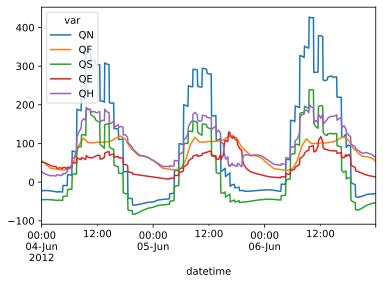

In [8]:
res_plot = df_output_s.SUEWS.loc[grid_s, ['QN', 'QF', 'QS', 'QE', 'QH']]
ax=res_plot.loc['2012 6 4':'2012 6 6'].plot()
plt.show()
ax.figure.savefig('sample_plot.png')

In [9]:
df_output_s.SUEWS

var                       Kdown  Kup       Ldown         Lup  Tsurf  \
grid datetime                                                         
1    2011-01-01 00:05:00    0.0  0.0  285.830750  333.950928   4.50   
     2011-01-01 00:10:00    0.0  0.0  285.830750  336.493265   4.50   
     2011-01-01 00:15:00    0.0  0.0  285.830750  336.493265   4.50   
     2011-01-01 00:20:00    0.0  0.0  285.830750  336.493265   4.50   
     2011-01-01 00:25:00    0.0  0.0  285.830750  336.493265   4.50   
...                         ...  ...         ...         ...    ...   
     2012-12-31 23:40:00    0.0  0.0  330.263407  362.952483  10.14   
     2012-12-31 23:45:00    0.0  0.0  330.263407  362.952483  10.14   
     2012-12-31 23:50:00    0.0  0.0  330.263407  362.952483  10.14   
     2012-12-31 23:55:00    0.0  0.0  330.263407  362.952483  10.14   
     2013-01-01 00:00:00    0.0  0.0  330.263407  362.952483  10.14   

var                              QN         QF         QS         QH  \
grid datetime                                                          
1    2011-01-01 00:05:00 -48.120178  40.574001 -26.570303  15.779908   
     2011-01-01 00:10:00 -50.662516  39.724283 -13.569432  11.773004   
     2011-01-01 00:15:00 -50.662516  38.874566 -13.447345  10.362795   
     2011-01-01 00:20:00 -50.662516  38.024849 -13.313665   8.975527   
     2011-01-01 00:25:00 -50.662516  37.175131 -13.178883   7.620949   
...                             ...        ...        ...        ...   
     2012-12-31 23:40:00 -32.689075  52.422737 -10.248719  19.897316   
     2012-12-31 23:45:00 -32.689075  51.496792 -10.247520  19.143990   
     2012-12-31 23:50:00 -32.689075  50.570847 -10.246018  18.389091   
     2012-12-31 23:55:00 -32.689075  46.174492 -10.244253  14.689015   
     2013-01-01 00:00:00 -32.689075  45.313275 -10.242264  13.984547   

var                              QE  ...  MeltWater  MeltWStore    SnowCh  \
grid datetime                        ...                                    
1    2011-01-01 00:05:00   3.081326  ...    0.00525    0.008155 -0.216175   
     2011-01-01 00:10:00 -11.404004  ...    0.05250    0.077128 -0.056430   
     2011-01-01 00:15:00 -11.572494  ...    0.05250    0.072713 -0.056409   
     2011-01-01 00:20:00 -11.750231  ...    0.05250    0.068301 -0.056387   
     2011-01-01 00:25:00 -11.937526  ...    0.05250    0.063891 -0.056364   
...                             ...  ...        ...         ...       ...   
     2012-12-31 23:40:00  10.085065  ...    0.00000    0.000000  0.000000   
     2012-12-31 23:45:00   9.911247  ...    0.00000    0.000000  0.000000   
     2012-12-31 23:50:00   9.738698  ...    0.00000    0.000000  0.000000   
     2012-12-31 23:55:00   9.040655  ...    0.00000    0.000000  0.000000   
     2013-01-01 00:00:00   8.881917  ...    0.00000    0.000000  0.000000   

var                       SnowRPaved  SnowRBldgs         Ts         T2  \
grid datetime                                                            
1    2011-01-01 00:05:00         0.0         0.0   5.504180   4.519984   
     2011-01-01 00:10:00         0.0         0.0   5.270614   4.514610   
     2011-01-01 00:15:00         0.0         0.0   5.184809   4.512889   
     2011-01-01 00:20:00         0.0         0.0   5.099200   4.511279   
     2011-01-01 00:25:00         0.0         0.0   5.014320   4.509803   
...                              ...         ...        ...        ...   
     2012-12-31 23:40:00         0.0         0.0  11.294232  10.160599   
     2012-12-31 23:45:00         0.0         0.0  11.253462  10.159843   
     2012-12-31 23:50:00         0.0         0.0  11.212449  10.159094   
     2012-12-31 23:55:00         0.0         0.0  11.008917  10.155565   
     2013-01-01 00:00:00         0.0         0.0  10.969651  10.154918   

var                             Q2       U10        RH2  
grid datetime                                            
1    2011-01-01 00:05:00  3.793741  1.260776  73.187214  


In [10]:
# Visa på skillnader

for i, wd, w, wud, wu in zip(init_col,[sub + '_d' for sub in w_col],w_col,[sub + '_d' for sub in wu_col],wu_col):
    df_merge[wd] = df_merge[w] - df_merge[i]
    df_merge[wud] = df_merge[wu] - df_merge[i]

In [11]:
# %%
# Start and end date
s = '2012 07 20'
e = '2012 07 29'
size = 10, 10
clr = ('#ff7f0e','#2ca02c')


# %%

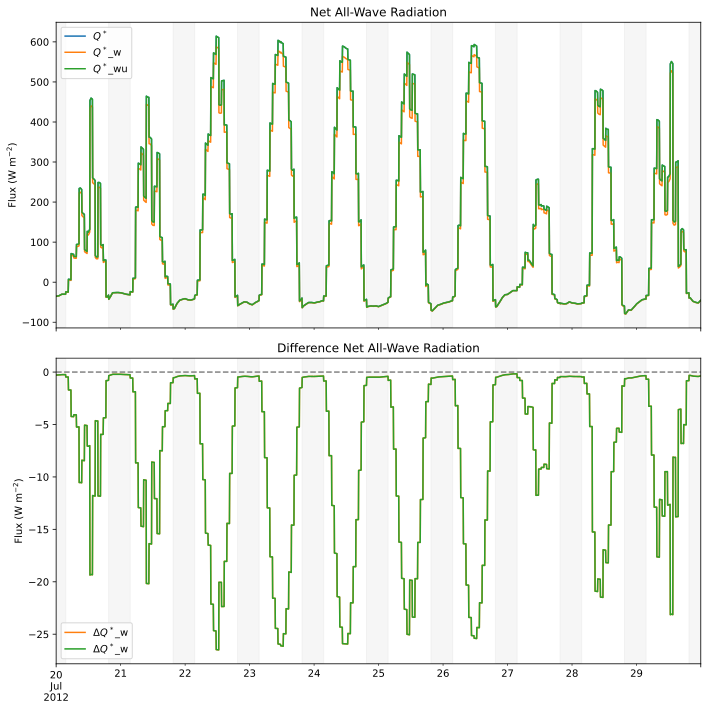

In [12]:
# Choose variable to plot as var
var = 'QN'
var_w =  var + '_w'
var_wd = var +'_w_d'
var_wu = var + '_wu'
var_wud= var + '_wu_d'

fig, axes = plt.subplots(2, 1, sharex=True)
a = df_merge.loc[s:e,[var, var_w, var_wu]].rename(columns=dict_var_disp)\
    .plot(ax=axes[0],figsize=(size),title=dict_var_title[var])
b = df_merge.loc[s:e,[var_wd, var_wd]].rename(columns=dict_var_disp)\
    .plot(ax=axes[1],figsize=(size),title=('Difference ' + dict_var_title[var]),color=clr)
plt.hlines(0,s,'2012 08',linestyles='--',colors='grey')

for i in [a,b]:
    night(i,df_merge,s,e)
    i.legend()
    i.set_ylabel(dict_var_ylabel[var])
    i.set_xlabel('')
fig.tight_layout()

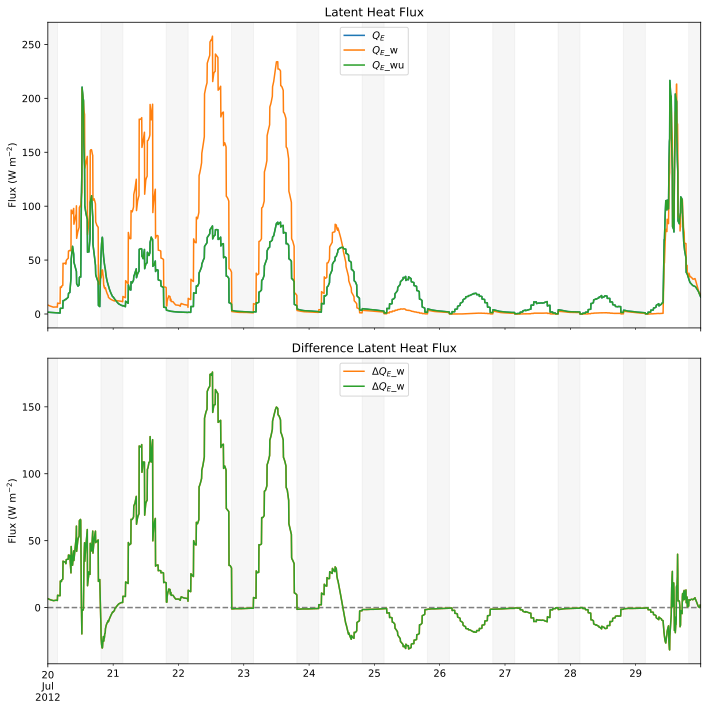

In [13]:
# %%
#from supy_plot import supy_plot
var = 'QE'
supy_plot(var, df_merge,s,e,size,clr)

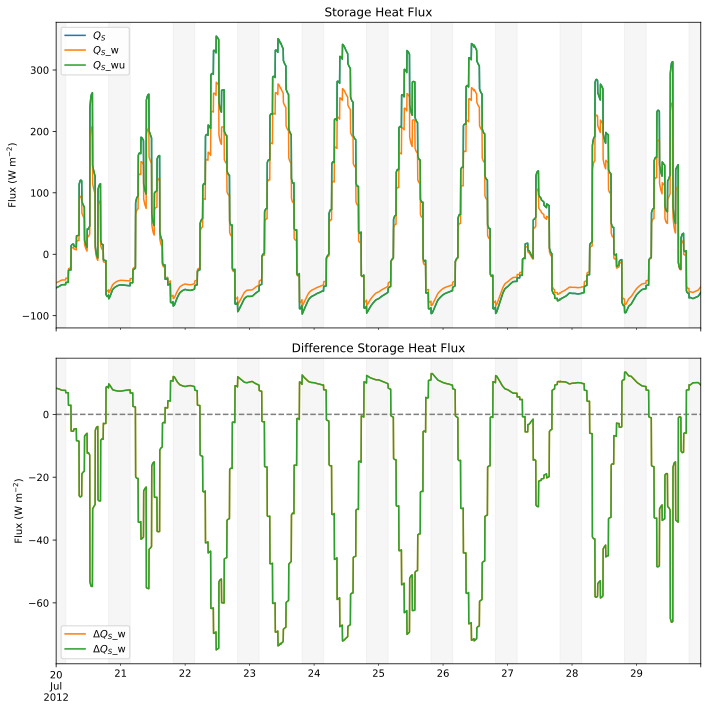

In [14]:
# %%
var = 'QS'
supy_plot(var, df_merge,s,e,size,clr)

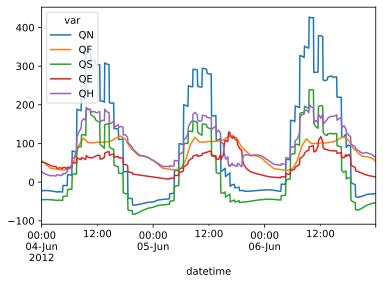

In [15]:
#plot results and save figure
res_plot = df_output_s.SUEWS.loc[grid_s, ['QN', 'QF', 'QS', 'QE', 'QH']]
ax=res_plot.loc['2012 6 4':'2012 6 6'].plot()
plt.show()
ax.figure.savefig('sample_plot.png')

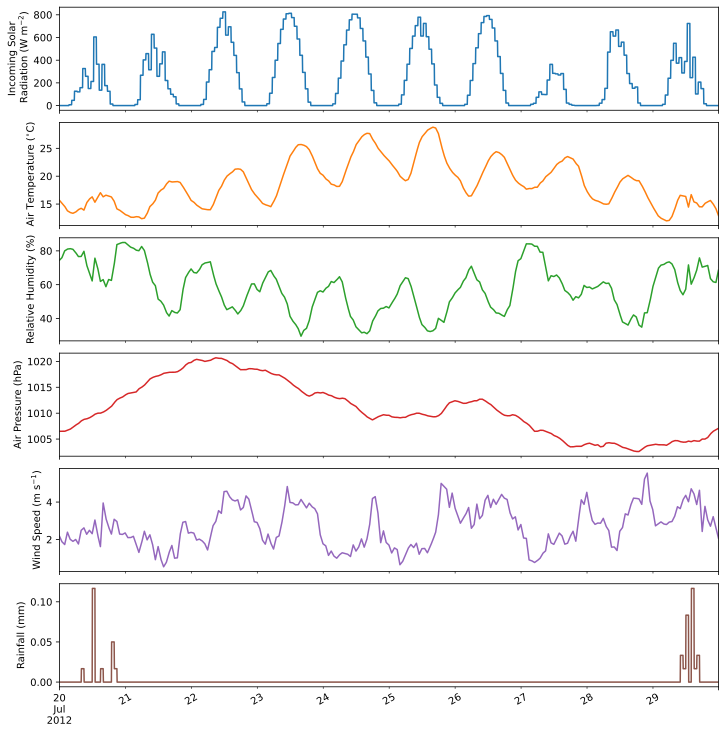

In [16]:
df_plot_forcing_x = df_forcing_s.loc[s:e, list_var_forcing].copy().shift(
    -1).dropna(how='any')
axes = df_plot_forcing_x.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])
    
# Shading used to indicate night (as time when sun is not present)

